In [245]:
import gym
import numpy as np
from collections import defaultdict 

import matplotlib as mpl
import matplotlib.pyplot as plt
import random

from matplotlib import rc
rc('font',**{'family':'sans-serif'})
rc('text', usetex=True)
rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
rc('text.latex',preamble=r'\usepackage[russian]{babel}')
rc('figure', **{'dpi': 300})

In [246]:
env = gym.make('Blackjack-v0', natural=True)
NumberOfStates = 2

In [247]:
def simple_strategy(state):
    score, dealer, _ = state
    
    if score < 19:
        return 1
    
    return 0
    

In [248]:
def run_episode(env, pi, eps=0.0):
    env.reset()
    state = env._get_obs()
        
    states = [(), state]
    actions = []
    done = False
    
    while True:
        action = pi(state) if np.random.rand() >= eps else np.random.randint(NumberOfStates)
        action = pi(state)
        actions.append(action)
        state, reward, done, _ = env.step(action)
        
        if done:
            break
        
        states.append(state)
   
    return states, actions, reward

In [249]:
def evaluate(env, strategy, iterations=10000):
    rewards = np.zeros(iterations, dtype=np.double)
    
    for i in range(iterations):
        states, actions, reward = run_episode(env, strategy)
        rewards[i] = reward 
    return rewards

In [250]:
revards = evaluate(env, simple_strategy)


Text(0.5, 1.0, 'Оценка выигрыша простой стратегии')

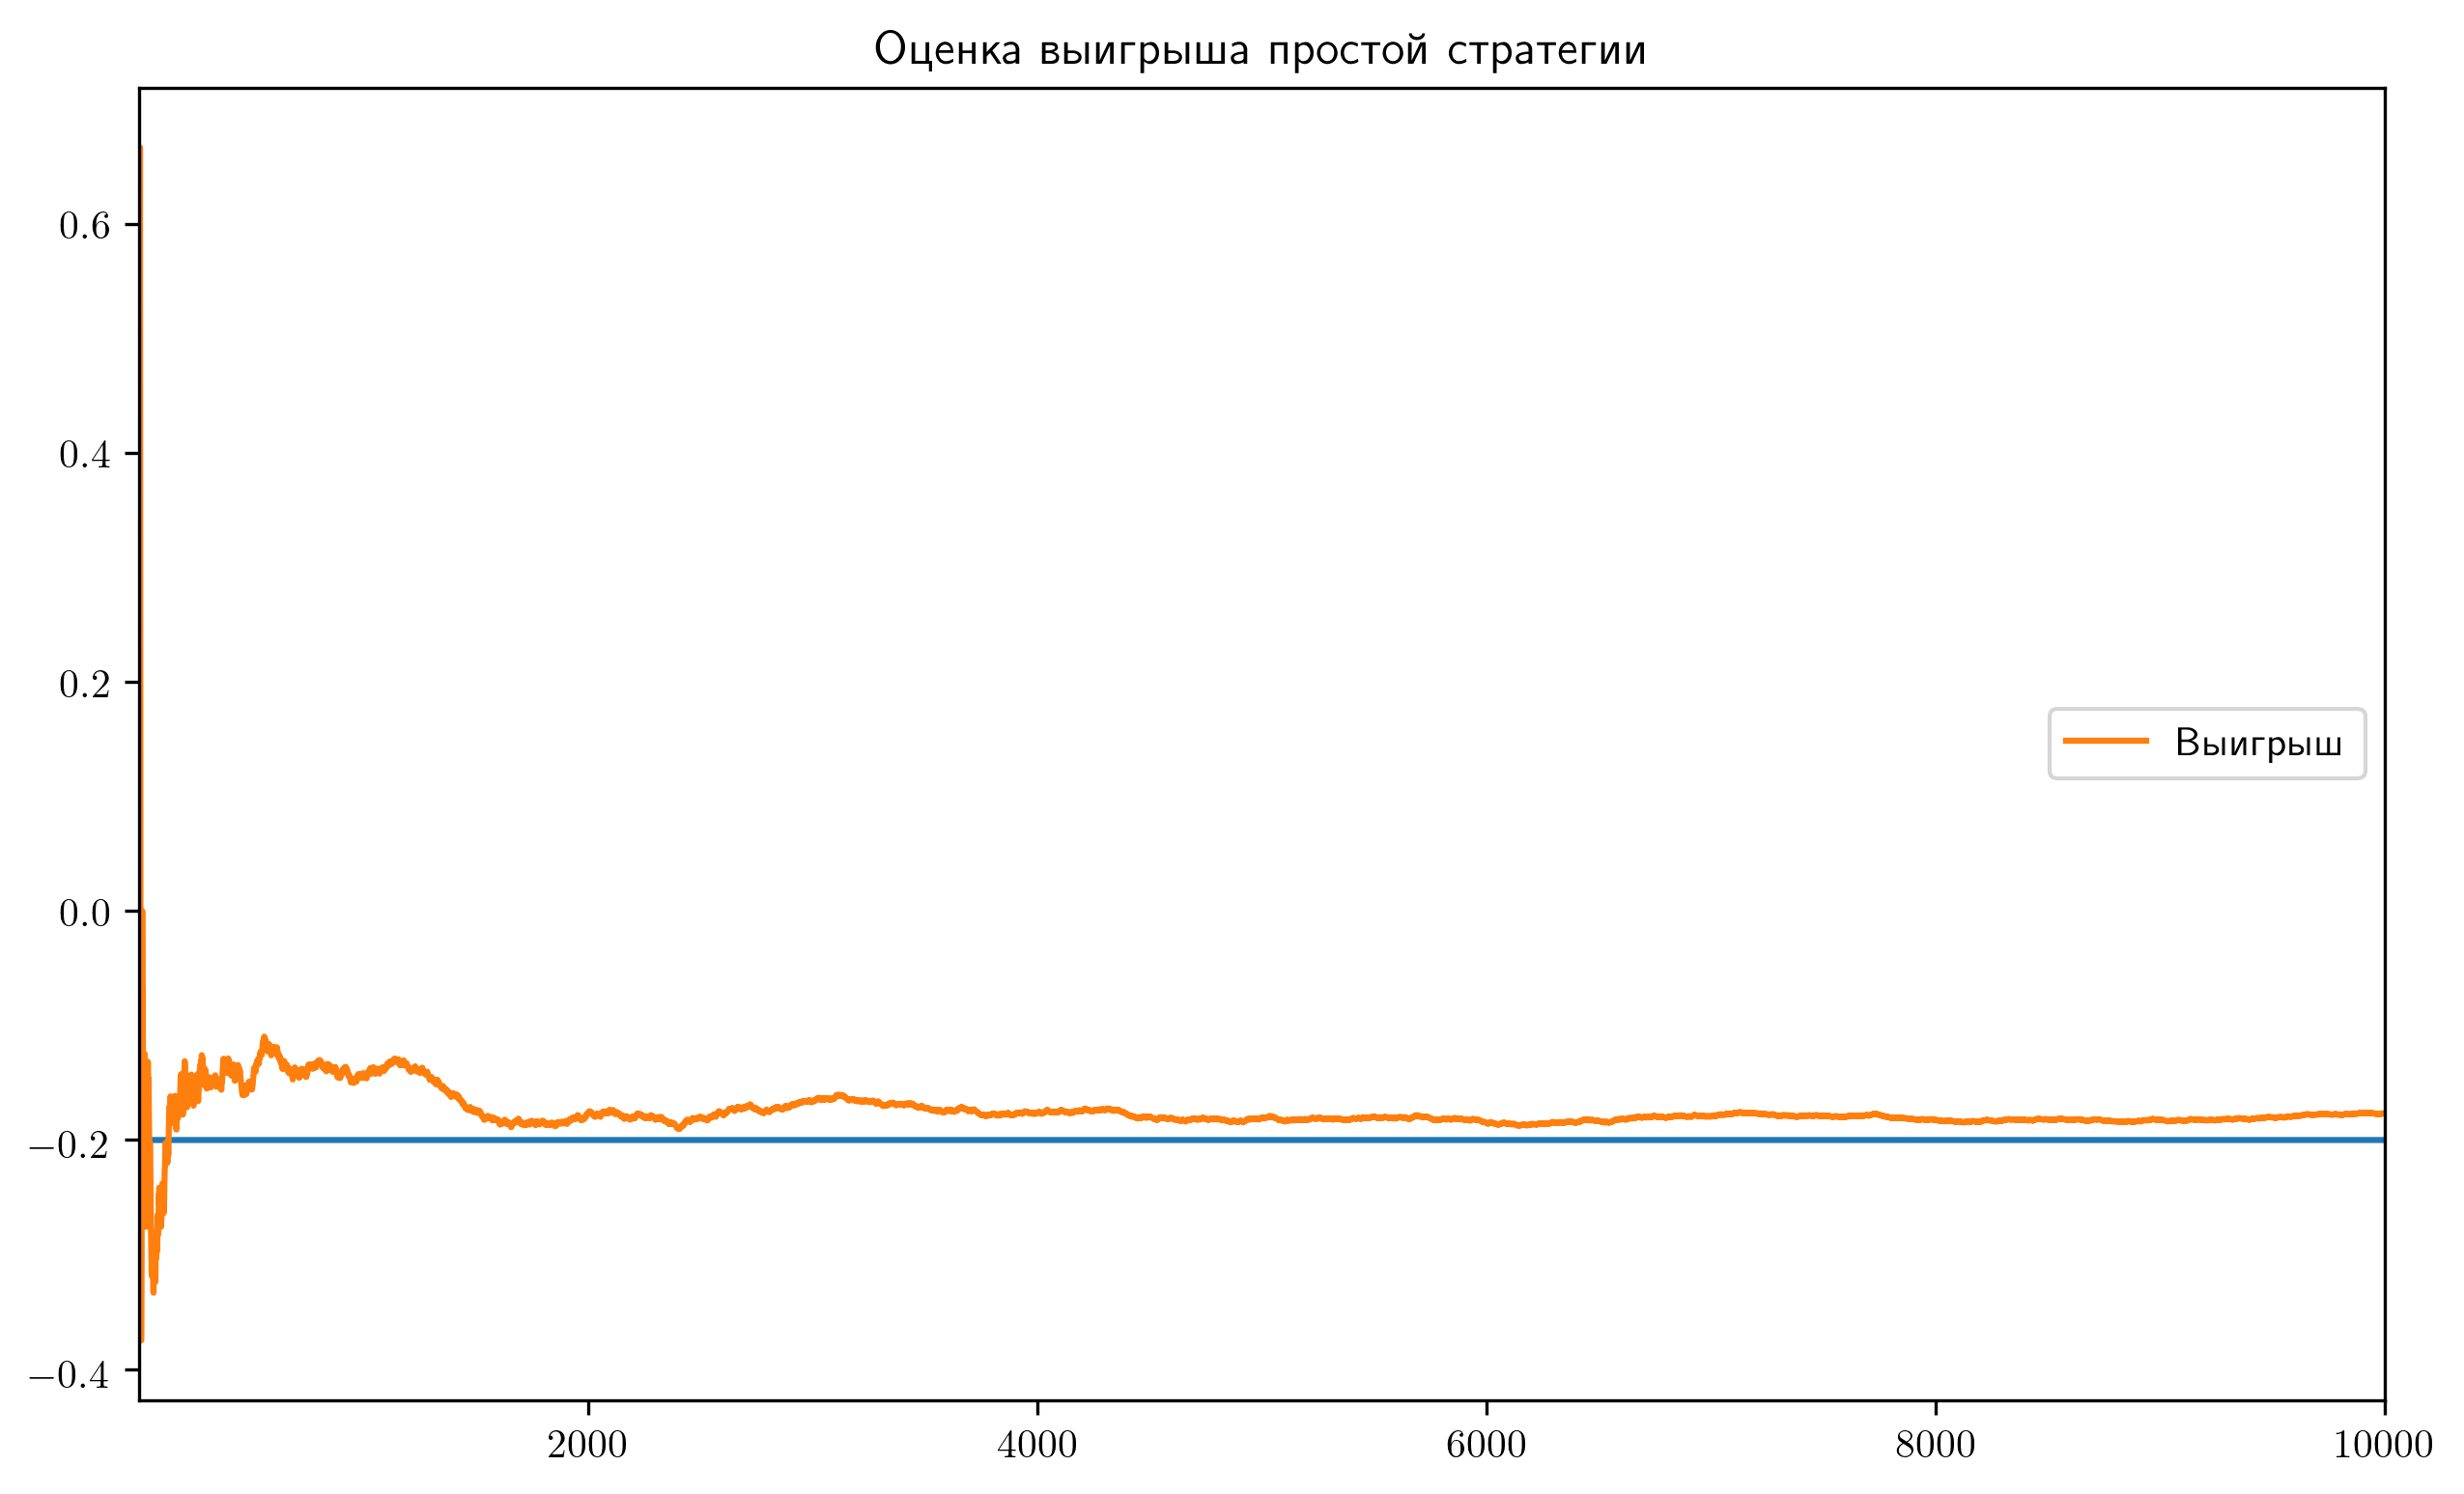

In [251]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x = np.arange(1, len(revards)+1)
values = np.cumsum(revards) / x

ax.plot(np.repeat(-0.2, len(revards)))
ax.plot(x, values, label="Выигрыш", color="C1")
ax.set_xlim((1, len(revards)))
ax.legend(loc="center right")
plt.title("Оценка выигрыша простой стратегии")

In [252]:
class Strategy():
    def __init__(self, number_of_states):
        self.pi = defaultdict(lambda: random.randrange(number_of_states))
    
    def step(self, state):
        return self.pi[state]
        
    def update(self, Q, state):
        self.pi[state] = np.argmax(Q[state])


In [253]:
evaluations = {}

In [222]:
epsilons = [0.05, 0.1, 0.2]
iterations = 100000
x = np.geomspace(1, iterations, num=20, dtype=int)

for e in epsilons:
    print("eps =", e)
    strat = Strategy(NumberOfStates)
    returns = defaultdict(list)
    Q = defaultdict(lambda: np.random.random(size=NumberOfStates))

    states_count = defaultdict(int)
    evaluations[e] = []

    for i in range(iterations+1):
        states, actions, reward = run_episode(env, strat.step, e)

        for j in range(len(actions)):
            state = states[j+1]
            action = actions[j]
            key = (state, action)
            returns[key].append(reward)
            Q[state][action] = sum(returns[key])/len(returns[key])
            strat.update(Q, state)

        if i in x:
            rews = evaluate(env, strat.step, 100000)
            evaluations[e].append(rews.mean())
            print("work in progress", i, evaluations[e][-1])
        


eps = 0.05
work in progress 1 -0.40396
work in progress 3 -0.390935
work in progress 6 -0.287035
work in progress 11 -0.27728
work in progress 20 -0.26009
work in progress 37 -0.24949
work in progress 69 -0.252285
work in progress 127 -0.228005
work in progress 233 -0.23217
work in progress 428 -0.17861
work in progress 784 -0.159825
work in progress 1438 -0.14757
work in progress 2636 -0.14466
work in progress 4832 -0.145125
work in progress 8858 -0.15203
work in progress 16237 -0.151725
work in progress 29763 -0.15423
work in progress 54555 -0.14794
work in progress 100000 -0.14843
eps = 0.1
work in progress 1 -0.355235
work in progress 3 -0.343705
work in progress 6 -0.32202
work in progress 11 -0.309175
work in progress 20 -0.29672
work in progress 37 -0.274325
work in progress 69 -0.219985
work in progress 127 -0.192575
work in progress 233 -0.1626
work in progress 428 -0.157225
work in progress 784 -0.12808
work in progress 1438 -0.134225
work in progress 2636 -0.12384
work in pr

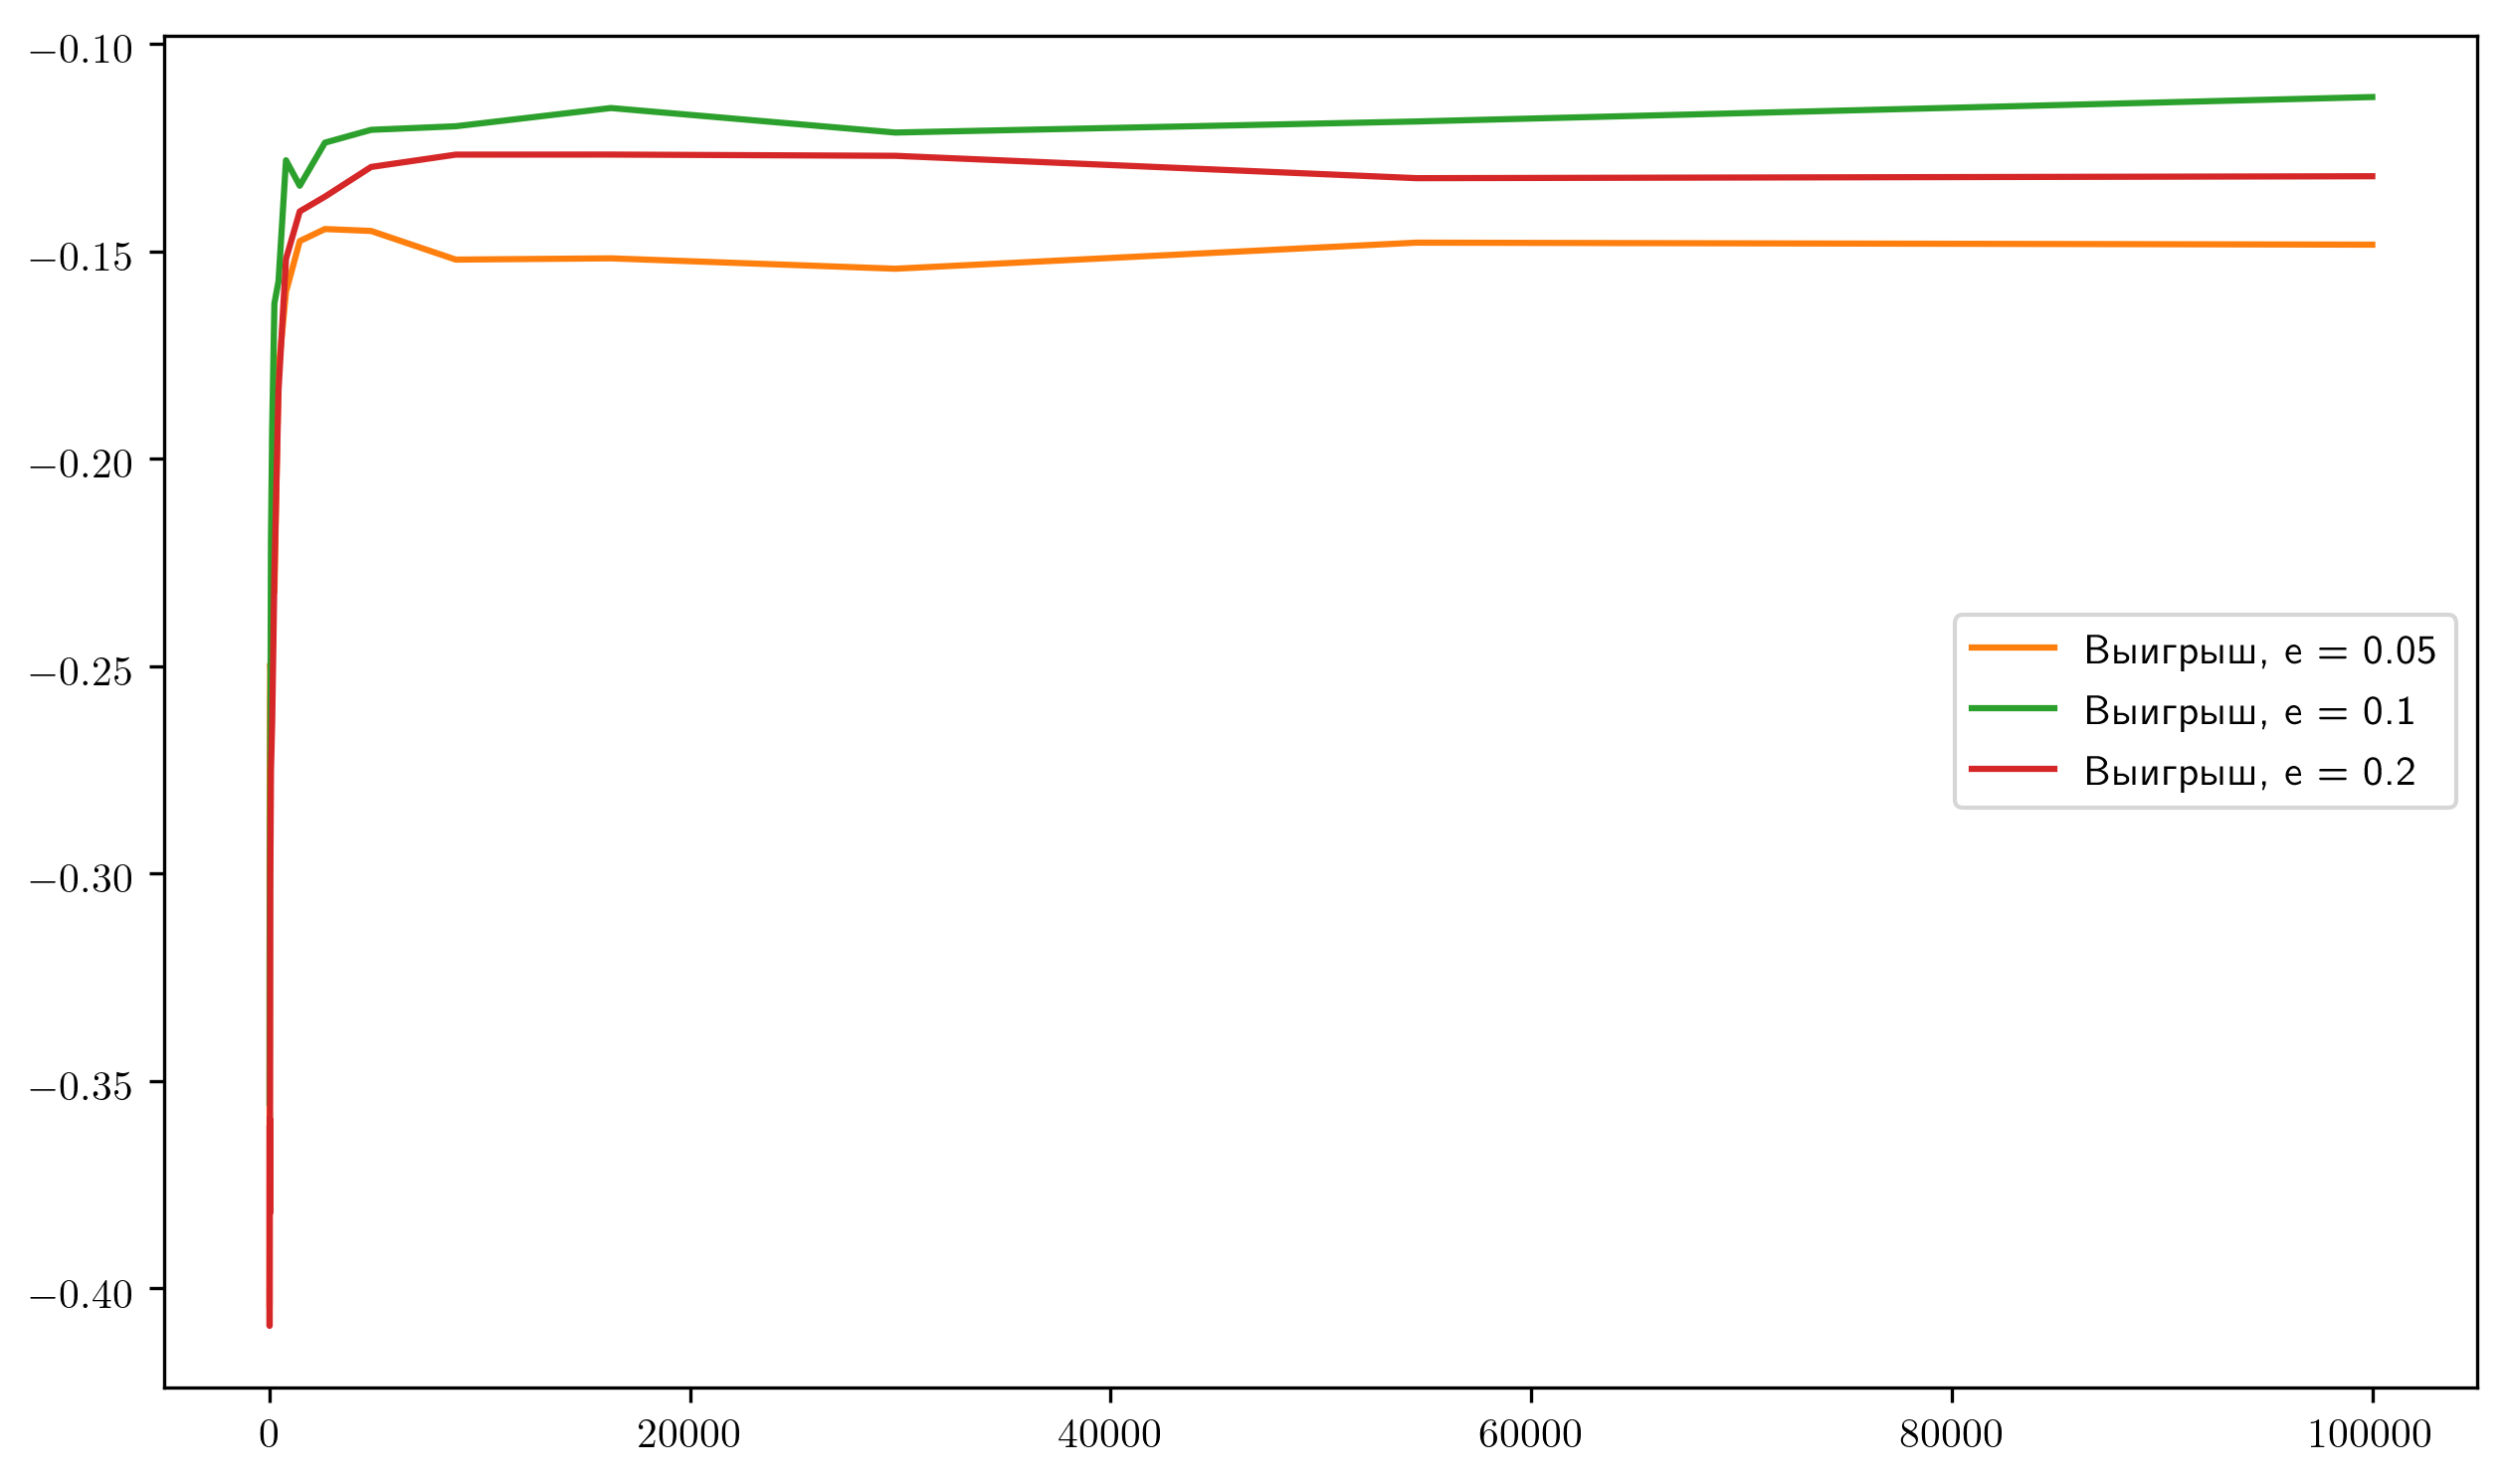

In [226]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(x[1:], evaluations[0.05], label="Выигрыш, e = 0.05", color="C1")
ax.plot(x[1:], evaluations[0.1], label="Выигрыш, e = 0.1", color="C2")
ax.plot(x[1:], evaluations[0.2], label="Выигрыш, e = 0.2", color="C3")
ax.legend(loc="center right")

In [235]:
from gym.envs.registration import register

register(
    id='BlackjackDoubleEnv-v2',
    entry_point='bj:BlackjackDoubleEnv',
)

In [254]:
env = gym.make('BlackjackDoubleEnv-v2', natural=True)
NumberOfStates = 3

In [255]:
epsilons = [0.05, 0.1, 0.2, 0.4]
iterations = 500000
x = np.geomspace(1, iterations, num=20, dtype=int)

for e in epsilons:
    print("eps =", e)
    strat = Strategy(NumberOfStates)
    returns = defaultdict(list)
    Q = defaultdict(lambda: np.random.random(size=NumberOfStates))

    states_count = defaultdict(int)
    evaluations[e] = []

    for i in range(iterations+1):
        states, actions, reward = run_episode(env, strat.step, e)

        for j in range(len(actions)):
            state = states[j+1]
            action = actions[j]
            key = (state, action)
            returns[key].append(reward)
            Q[state][action] = sum(returns[key])/len(returns[key])
            strat.update(Q, state)

        if i in x:
            rews = evaluate(env, strat.step, 100000)
            evaluations[e].append(rews.mean())
            print("work in progress", i, evaluations[e][-1])
        


eps = 0.05
work in progress 1 -0.59822
work in progress 3 -0.609925
work in progress 7 -0.579025
work in progress 15 -0.556415
work in progress 31 -0.564135
work in progress 63 -0.41576
work in progress 125 -0.43012
work in progress 250 -0.339125
work in progress 500 -0.2846
work in progress 998 -0.21263
work in progress 1992 -0.202665
work in progress 3975 -0.15267
work in progress 7930 -0.16857
work in progress 15821 -0.138765
work in progress 31563 -0.135475
work in progress 62969 -0.13069
work in progress 125625 -0.136385
work in progress 250624 -0.131505
work in progress 499999 -0.12869
eps = 0.1
work in progress 1 -0.50363
work in progress 3 -0.494365
work in progress 7 -0.48866
work in progress 15 -0.501215
work in progress 31 -0.51093
work in progress 63 -0.42353
work in progress 125 -0.346865
work in progress 250 -0.313835
work in progress 500 -0.20579
work in progress 998 -0.170255
work in progress 1992 -0.165825
work in progress 3975 -0.13939
work in progress 7930 -0.12848
w

In [260]:
print(f'Выигрыш, e = {epsilons[0]}.')

Выигрыш, e = 0.05.


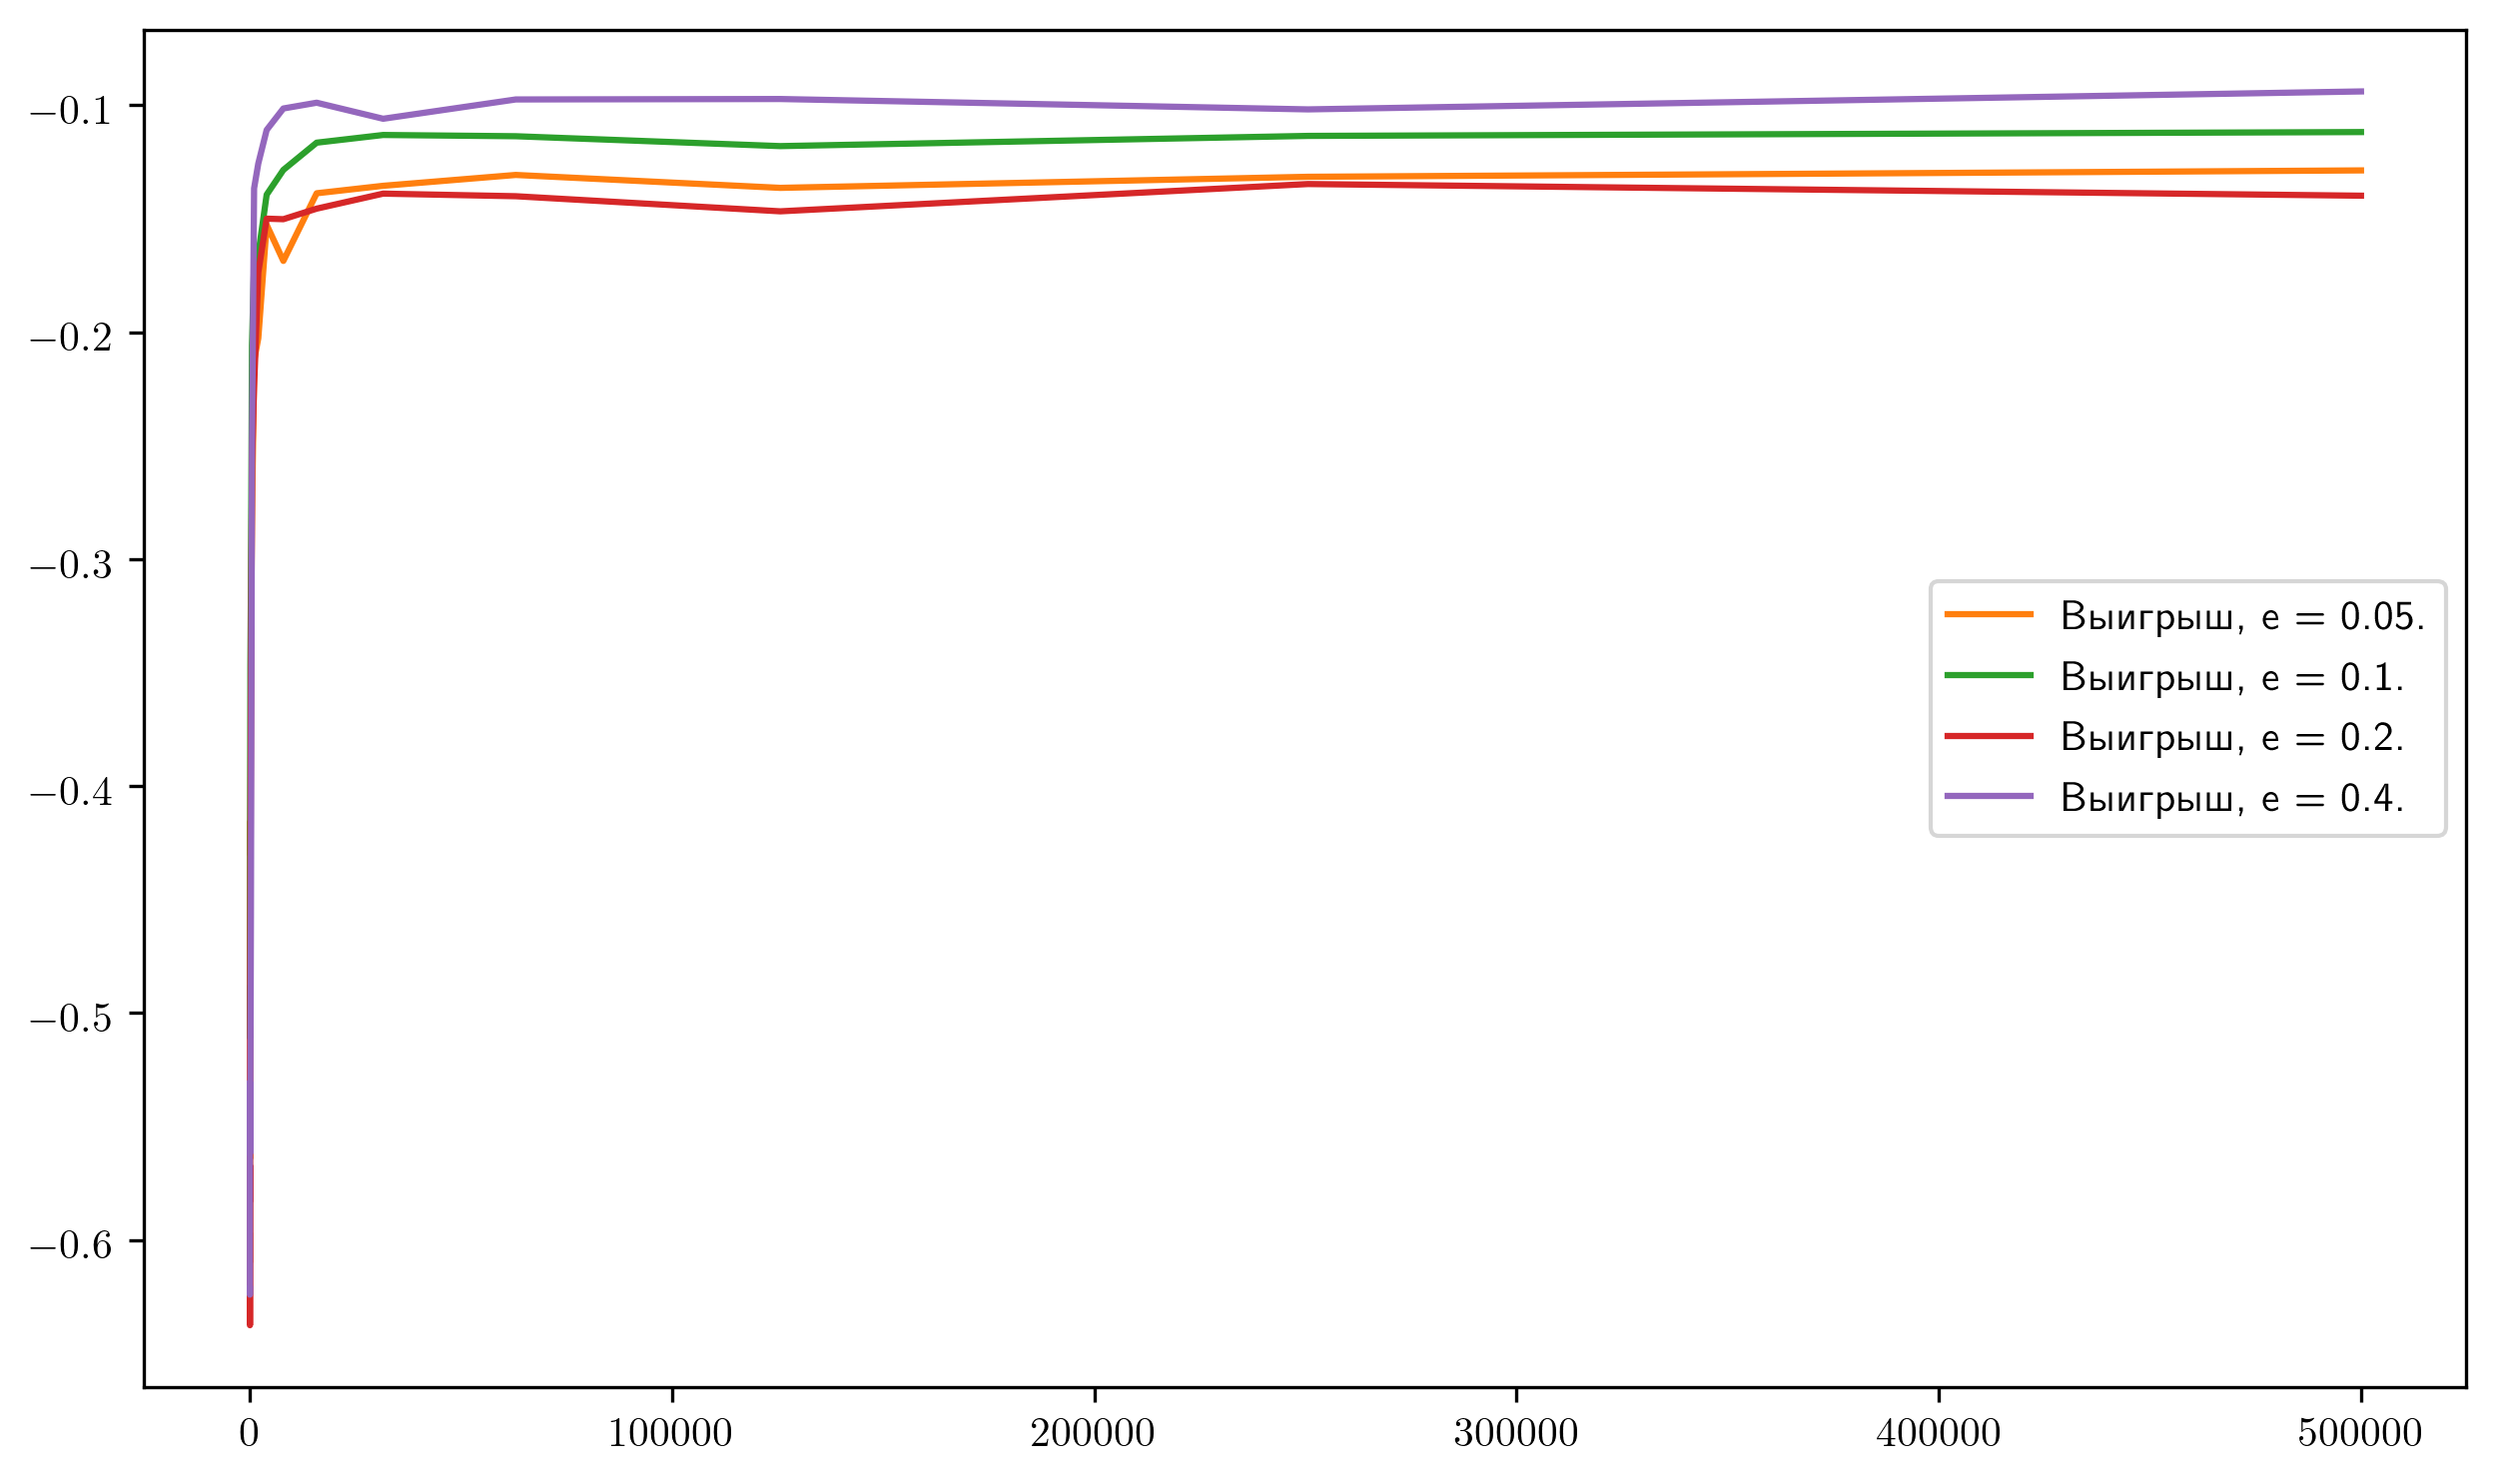

In [263]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for i in range(len(epsilons)):
    ax.plot(x[1:], evaluations[epsilons[i]], label=f'Выигрыш, e = {epsilons[i]}.', color=f'C{i+1}')
ax.legend(loc="center right")

# Выводы
* Я сознательно отказался от подсчёта функции G, так как $ \gamma = 1 $. Так как длина игры зависит больше от случайных событий, чем от выбора игрока,  а значит нет смысла уменьшать награду за более продолжительные раунды.
* Простая стратегия проигрывает 0.18 по нашей оценке 
* Обученная нами статегия на базовой версии игры проигрывает уже 0.12
* Добавление удвоения даёт нам проигрыш 0.10
* Моё решение не всегда сходится к оптимальной стратегии при маленьких 
